<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/ml_dl_intro/blob/main/2_planificacion/3_dl/geron/10_chapter/pagina_508_3_ed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/ml_dl_intro/blob/main/2_planificacion/3_dl/geron/10_chapter/pagina_508_3_ed.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Prompt para el diseño de la de la guía didáctica de lectura experimental con práctica de codificación  

Tradúceme el siguiente texto al español. Este texto es del libro de Aurelien Géron "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition". El texto es el siguiente: "Building Complex Models Using the Functional API
 One example of a nonsequential neural network is a Wide & Deep neural
 network. This neural network architecture was introduced in a 2016 paper by
 Heng-Tze Cheng et al.⁠ 
15
 It connects all or part of the inputs directly to the
 output layer, as shown in Figure 10-13. This architecture makes it possible
 for the neural network to learn both deep patterns (using the deep path) and
 simple rules (through the short path).⁠ 
16
 In contrast, a regular MLP forces all
 the data to flow through the full stack of layers; thus, simple patterns in the
 data may end up being distorted by this sequence of transformations.
 Figure 10-13. Wide & Deep neural network
 Let’s build such a neural network to tackle the California housing problem:
 normalization_layer = tf.keras.layers.Normalization()
 hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
 concat_layer = tf.keras.layers.Concatenate()
 output_layer = tf.keras.layers.Dense(1)
 input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
 normalized = normalization_layer(input_)
 hidden1 = hidden_layer1(normalized)
 hidden2 = hidden_layer2(hidden1)
 concat = concat_layer([normalized, hidden2])
 output = output_layer(concat)
 model = tf.keras.Model(inputs=[input_], outputs=[output])
 At a high level, the first five lines create all the layers we need to build the
 model, the next six lines use these layers just like functions to go from the
 input to the output, and the last line creates a Keras Model object by pointing
 to the input and the output. Let’s go through this code in more detail:
 First, we create five layers: a Normalization layer to standardize the
 inputs, two Dense layers with 30 neurons each, using the ReLU
 activation function, a Concatenate layer, and one more Dense layer with
 a single neuron for the output layer, without any activation function.
 Next, we create an Input object (the variable name input_ is used to
 avoid overshadowing Python’s built-in input() function). This is a
 specification of the kind of input the model will get, including its shape
 and optionally its dtype, which defaults to 32-bit floats. A model may
 actually have multiple inputs, as you will see shortly.
 Then we use the Normalization layer just like a function, passing it the
 Input object. This is why this is called the functional API. Note that we
 are just telling Keras how it should connect the layers together; no actual
 data is being processed yet, as the Input object is just a data
 specification. In other words, it’s a symbolic input. The output of this
 call is also symbolic: normalized doesn’t store any actual data, it’s just
 used to construct the model.
 In the same way, we then pass normalized to hidden_layer1, which
 outputs hidden1, and we pass hidden1 to hidden_layer2, which outputs
hidden2.
 So far we’ve connected the layers sequentially, but then we use the
 concat_layer to concatenate the input and the second hidden layer’s
 output. Again, no actual data is concatenated yet: it’s all symbolic, to
 build the model.
 Then we pass concat to the output_layer, which gives us the final output.
 Lastly, we create a Keras Model, specifying which inputs and outputs to
 use.
 Once you have built this Keras model, everything is exactly like earlier, so
 there’s no need to repeat it here: you compile the model, adapt the
 Normalization layer, fit the model, evaluate it, and use it to make predictions.
 But what if you want to send a subset of the features through the wide path
 and a different subset (possibly overlapping) through the deep path, as
 illustrated in Figure 10-14? In this case, one solution is to use multiple inputs.
 For example, suppose we want to send five features through the wide path
 (features 0 to 4), and six features through the deep path (features 2 to 7). We
 can do this as follows:
 input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
 input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
 norm_layer_wide = tf.keras.layers.Normalization()
 norm_layer_deep = tf.keras.layers.Normalization()
 norm_wide = norm_layer_wide(input_wide)
 norm_deep = norm_layer_deep(input_deep)
 hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
 hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
 concat = tf.keras.layers.concatenate([norm_wide, hidden2])
 output = tf.keras.layers.Dense(1)(concat)
 model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
Figure 10-14. Handling multiple inputs
 There are a few things to note in this example, compared to the previous one:
 Each Dense layer is created and called on the same line. This is a
 common practice, as it makes the code more concise without losing
 clarity. However, we can’t do this with the Normalization layer since we
 need a reference to the layer to be able to call its adapt() method before
 fitting the model.
 We used tf.keras.layers.concatenate(), which creates a Concatenate layer
 and calls it with the given inputs.
 We specified inputs=[input_wide, input_deep] when creating the model,
 since there are two inputs.
 Now we can compile the model as usual, but when we call the fit() method,
 instead of passing a single input matrix X_train, we must pass a pair of
 matrices (X_train_wide, X_train_deep), one per input. The same is true for
 X_valid, and also for X_test and X_new when you call evaluate() or
 predict():
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
 model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
 X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
 X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
 X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
 X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]
 norm_layer_wide.adapt(X_train_wide)
 norm_layer_deep.adapt(X_train_deep)
 history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
 validation_data=((X_valid_wide, X_valid_deep), y_valid))
 mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
 y_pred = model.predict((X_new_wide, X_new_deep))
 TIP
 Instead of passing a tuple (X_train_wide, X_train_deep), you can pass a dictionary
 {"input_wide": X_train_wide, "input_deep": X_train_deep}, if you set
 name="input_wide" and name="input_deep" when creating the inputs. This is highly
 recommended when there are many inputs, to clarify the code and avoid getting the order
 wrong.
 There are also many use cases in which you may want to have multiple
 outputs:
 The task may demand it. For instance, you may want to locate and
 classify the main object in a picture. This is both a regression tasks and a
 classification task.
 Similarly, you may have multiple independent tasks based on the same
 data. Sure, you could train one neural network per task, but in many
 cases you will get better results on all tasks by training a single neural
 network with one output per task. This is because the neural network can
 learn features in the data that are useful across tasks. For example, you
 could perform multitask classification on pictures of faces, using one
 output to classify the person’s facial expression (smiling, surprised, etc.)
 and another output to identify whether they are wearing glasses or not.
 Another use case is as a regularization technique (i.e., a training
constraint whose objective is to reduce overfitting and thus improve the
 model’s ability to generalize). For example, you may want to add an
 auxiliary output in a neural network architecture (see Figure 10-15) to
 ensure that the underlying part of the network learns something useful
 on its own, without relying on the rest of the network". Y genérame las imágenes asociadas a este texto, que son las figuras 10-13, 10-14 y 10-15.

Esta es una **traducción al español** del texto completo, y al final te preparo las imágenes asociadas a las Figuras **10-13, 10-14 y 10-15** de manera ilustrativa (en estilo claro y didáctico).

---



## Traducción al español



### Construcción de modelos complejos usando la API funcional



Un ejemplo de red neuronal no secuencial es una **red neuronal Ancha y Profunda (Wide & Deep)**.
Esta arquitectura de red neuronal fue introducida en un [artículo de 2016 por Heng-Tze Cheng et al.](https://arxiv.org/abs/1606.07792) 



Conecta **toda o parte de las entradas directamente a la capa de salida**, como se muestra en la Figura 10-13.
Esta arquitectura hace posible que la red neuronal aprenda **tanto patrones profundos** (usando la ruta profunda) como **reglas simples** (a través de la ruta corta).



En contraste, una MLP regular (perceptrón multicapa) obliga a que **todos los datos fluyan a través de toda la pila de capas**; por lo tanto, los patrones simples en los datos pueden terminar distorsionados por esta secuencia de transformaciones.

---



### Figura 10-13. Red neuronal Ancha y Profunda (Wide & Deep)


<img src = 'fig_10_13.png' width = 300>  


Vamos a construir una red neuronal de este tipo para abordar el problema de la vivienda en California:


In [2]:

# importante: Este código es un ejemplo de cómo construir una red neuronal Ancha y Profunda (Wide & Deep) utilizando TensorFlow y Keras.
# El dataset utilizado es el de California Housing, que es adecuado para un contexto de administración de empresas.
# Asegúrate de tener instaladas las bibliotecas necesarias: tensorflow, pandas, sklearn
import tensorflow as tf # Importar TensorFlow
from sklearn.datasets import fetch_california_housing # Importar el dataset de California Housing
from sklearn.model_selection import train_test_split # Importar la función para dividir el dataset
import pandas as pd # 


In [3]:
# Cargar el dataset de California Housing
housing = fetch_california_housing()


In [4]:
# Convertir a DataFrame para facilitar la manipulación
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
# Añadir la columna objetivo
data['MedHouseVal'] = housing.target
data.head()  # Mostrar las primeras filas del DataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop('MedHouseVal', axis=1),
                                                    data['MedHouseVal'], test_size=0.2, random_state=42)


In [8]:

normalization_layer = tf.keras.layers.Normalization() # Ajustar la capa de normalización
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])




En un nivel general:

* Las primeras cinco líneas crean todas las capas necesarias para construir el modelo.
* Las siguientes seis líneas **usan estas capas como funciones**, pasando de la entrada a la salida.
* La última línea crea un objeto `Model` de Keras, señalando cuál es la entrada y cuál es la salida.



**Explicación paso a paso:**

1. Se crean cinco capas:

   * Una capa de **Normalización** para estandarizar las entradas.
   * Dos capas **Dense** con 30 neuronas cada una, usando función de activación ReLU.
   * Una capa de **Concatenación**.
   * Una capa **Dense** de salida con una sola neurona, sin activación.

2. Se crea un objeto de entrada `Input` (`input_`). Este especifica el tipo de entrada que recibirá el modelo (su forma y opcionalmente el tipo de dato).

3. La capa de normalización se aplica como una función sobre la entrada. Por esto se llama **API funcional**.

   * Importante: no se procesan datos reales en este momento, todo es **simbólico**.

4. Luego se conectan secuencialmente `normalized → hidden1 → hidden2`.

5. Después se concatenan la entrada normalizada y la segunda capa oculta (`concat`).

6. `concat` pasa a la capa de salida.

7. Finalmente, se crea el modelo con entradas y salidas.

Después de construir el modelo:

* Se compila, se adapta la capa de normalización, se entrena (`fit`), se evalúa y se hacen predicciones, tal como en ejemplos anteriores.

---

### Figura 10-14. Manejo de múltiples entradas



Ahora bien, ¿qué pasa si queremos enviar **un subconjunto de características** por la ruta ancha y **otro subconjunto (posiblemente solapado)** por la ruta profunda?

Ejemplo:

* Queremos enviar **5 características (0–4)** por la ruta ancha.
* Y **6 características (2–7)** por la ruta profunda.


In [9]:
input_wide = tf.keras.layers.Input(shape=[5])   # características 0 a 4
input_deep = tf.keras.layers.Input(shape=[6])   # características 2 a 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])



**Notas importantes en este ejemplo:**

* Cada capa `Dense` se crea y se llama en la misma línea (código más conciso).
* Con la capa `Normalization` esto no es posible porque necesitamos adaptarla antes del entrenamiento.
* Para concatenar usamos `tf.keras.layers.concatenate()`.
* El modelo tiene **dos entradas**: `inputs=[input_wide, input_deep]`.



Al entrenar (`fit`) y evaluar (`evaluate`), en lugar de pasar una sola matriz `X_train`, debemos pasar un **par de matrices** `(X_train_wide, X_train_deep)`.


In [10]:


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide,  X_test_deep  = X_test[:, :5],  X_test[:, 2:]
X_new_wide,   X_new_deep   = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred   = model.predict((X_new_wide, X_new_deep))



InvalidIndexError: (slice(None, None, None), slice(None, 5, None))


💡 **TIP**:
En vez de pasar una tupla `(X_train_wide, X_train_deep)`, se puede pasar un diccionario:



```python
{"input_wide": X_train_wide, "input_deep": X_train_deep}
```



si se asigna `name="input_wide"` y `name="input_deep"` en las entradas. Esto es muy recomendable cuando hay muchas entradas.

---

### Figura 10-15. Múltiples salidas



Hay muchos casos donde se necesitan **múltiples salidas**:

1. **La tarea lo exige**:

   * Ejemplo: localizar y clasificar un objeto en una imagen (regresión + clasificación).

2. **Múltiples tareas independientes** basadas en los mismos datos:

   * Entrenar un modelo por tarea es posible, pero suele ser mejor entrenar **una sola red con varias salidas**.
   * Ejemplo: en reconocimiento facial, una salida para clasificar la **expresión** (sonriente, sorprendido, etc.) y otra para detectar si usa **gafas**.

3. **Regularización**:

   * Se puede añadir una **salida auxiliar** para forzar que una parte de la red aprenda algo útil por sí misma, mejorando la capacidad de generalización.

---

## Imágenes generadas

Ahora te preparo ilustraciones claras y modernas para las tres figuras.


figuara 10_13

# Practica de codificación de acuerdo al texto anterior    

## Prompt  para el diseño de la práctica de codificación  

Dame, por favor, un diseño de práctica de codificación con Python, para aprender de manera activa, interactiva y experimental, todo lo que Géron presenta sobre redes neuronales en las páginas que me acabas de traducir (Páginas 508, 509, 510, 511, 512 y 513 de la tercera edición de Géron)    



Te propongo un **diseño de práctica de codificación con Python** que sigue tu enfoque **activo, interactivo y experimental** para que tus estudiantes comprendan de manera práctica lo que explica Géron en esas páginas sobre **redes neuronales con la API funcional de Keras**.



La práctica está dividida en **fases experimentales**, con objetivos claros y actividades que van de lo simple a lo complejo.

---



# Práctica de codificación: Redes Neuronales con la API Funcional en Keras



## Objetivos de Aprendizaje

1. Diferenciar entre la API Secuencial y la **API Funcional** en Keras.
2. Construir una **red neuronal Wide & Deep** para el problema de predicción de precios de vivienda en California.
3. Implementar arquitecturas con **múltiples entradas** y entender cómo dividir y procesar subconjuntos de características.
4. Explorar arquitecturas con **múltiples salidas** y reflexionar sobre sus ventajas (multitarea y regularización).

---



## Parte 1. Calentamiento: API secuencial vs API funcional

**Actividad 1.**

* Construye una red MLP secuencial básica para regresión:


import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar dataset
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Modelo secuencial
seq_model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

seq_model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
history = seq_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))




Pregunta reflexiva:

* ¿Qué limitaciones encuentras en este enfoque secuencial?

---



## Parte 2. API Funcional: Red Wide & Deep

**Actividad 2.**

* Construye la arquitectura **Wide & Deep** (Figura 10-13)


In [11]:
normalization_layer = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30, activation="relu")
hidden2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
norm = normalization_layer(input_)
h1 = hidden1(norm)
h2 = hidden2(h1)
concat = concat_layer([norm, h2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))



UnboundLocalError: cannot access local variable 'input_shape' where it is not associated with a value


Pregunta reflexiva:

* ¿Qué ventaja aporta la **ruta corta (wide path)** respecto a la secuencial?

---



## Parte 3. Múltiples entradas

**Actividad 3.**

* Divide las características:

  * **Wide path**: columnas 0–4
  * **Deep path**: columnas 2–7

```python
input_wide = tf.keras.layers.Input(shape=[5], name="input_wide")
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep")

norm_wide = tf.keras.layers.Normalization()(input_wide)
norm_deep = tf.keras.layers.Normalization()(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

multi_input_model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

multi_input_model.compile(loss="mse", optimizer="adam", metrics=["RootMeanSquaredError"])
```

Dividir dataset:

```python
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:8]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:8]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:8]

history = multi_input_model.fit((X_train_wide, X_train_deep), y_train, epochs=10,
                                validation_data=((X_valid_wide, X_valid_deep), y_valid))
```

👉 Pregunta reflexiva:

* ¿Qué utilidad tendría asignar diferentes subconjuntos de características a diferentes rutas?

---

## 🧪 Parte 4. Múltiples salidas

**Actividad 4.**

* Crea una red con **dos salidas**:

  * Salida principal: regresión de precios.
  * Salida auxiliar: predicción auxiliar con la salida de la primera capa oculta.

```python
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
norm = tf.keras.layers.Normalization()(input_)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

main_output = tf.keras.layers.Dense(1, name="main_output")(hidden2)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden1)

multi_output_model = tf.keras.Model(inputs=[input_], outputs=[main_output, aux_output])

multi_output_model.compile(
    loss={"main_output": "mse", "aux_output": "mse"},
    loss_weights={"main_output": 0.9, "aux_output": 0.1},
    optimizer="adam",
    metrics=["RootMeanSquaredError"]
)

history = multi_output_model.fit(X_train, {"main_output": y_train, "aux_output": y_train},
                                 epochs=10, validation_data=(X_valid, {"main_output": y_valid, "aux_output": y_valid}))
```

👉 Pregunta reflexiva:

* ¿Por qué puede servir como **regularización** añadir una salida auxiliar?

---

## 🧪 Parte 5. Experimentación libre

* Modifica el número de neuronas y capas.
* Prueba con otras funciones de activación.
* Cambia el `loss_weights` para ver su impacto en el aprendizaje multitarea.
* Grafica la función de pérdida y el error cuadrático medio.

---

## 📌 Producto esperado

* Cuaderno Jupyter con código ejecutable y comentarios.
* Gráficos de curvas de entrenamiento.
* Respuestas argumentadas a las preguntas reflexivas.

---

Marco, ¿quieres que te prepare este diseño en formato **cuaderno Jupyter listo para usar (con celdas de código, texto y preguntas reflexivas intercaladas)** para que lo uses directamente con tus estudiantes?



# Práctica de codificación adaptando lo que enseña este texto a un problema de administración de empresas en Caucasia Antioquia Colombia.  



Te propongo un **diseño de práctica de codificación en Python con Jupyter Notebook** para enseñar redes neuronales (capítulo de Géron, pp. 508–513) en un **contexto de administración de empresas**, con un dataset sencillo y significativo para los estudiantes de Ciencias Económicas de la UdeA Campus Caucasia.





# Diseño de práctica: Redes neuronales en administración de empresas

## Objetivo de aprendizaje

Que los estudiantes comprendan, implementen y experimenten con redes neuronales artificiales para resolver un problema sencillo de predicción asociado a **gestión empresarial** (ejemplo: predicción de ventas según inversión en marketing, número de empleados, y satisfacción del cliente).



## 📊 Dataset propuesto (simulado y sencillo)

Variables:

* `marketing_gasto` (millones de pesos invertidos en publicidad).
* `num_empleados` (número de trabajadores de la empresa).
* `satisfaccion_cliente` (escala de 1 a 10).
* `ventas` (millones de pesos de ventas anuales, variable objetivo).

Se puede generar un dataset sintético con `numpy` y `pandas` para la práctica.

---



## 📔 Estructura del cuaderno (listo para Jupyter)

### 1. Introducción teórica

📄 **Markdown**

* Breve explicación de qué es una red neuronal (resumido de Géron, pp. 508–513).
* Importancia de usar redes neuronales en administración de empresas: predicción de ventas, análisis de clientes, toma de decisiones.

💡 **Pregunta reflexiva**:

> ¿En qué situaciones de la vida real en Caucasia una empresa local podría usar una red neuronal para mejorar su desempeño?

---



### 2. Preparación del dataset


In [5]:
import numpy as np
import pandas as pd

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Variables independientes
marketing_gasto = np.random.uniform(10, 200, 100)  # en millones
num_empleados = np.random.randint(5, 50, 100)
satisfaccion_cliente = np.random.uniform(1, 10, 100)

# Variable objetivo (ventas)
ventas = 5*marketing_gasto + 2*num_empleados + 10*satisfaccion_cliente + np.random.normal(0, 30, 100)

# Dataset
df = pd.DataFrame({
    "marketing_gasto": marketing_gasto,
    "num_empleados": num_empleados,
    "satisfaccion_cliente": satisfaccion_cliente,
    "ventas": ventas
})

df.head()



,marketing_gasto,num_empleados,satisfaccion_cliente,ventas
0,81.162623,36,2.569298,546.626781
1,190.635718,43,7.218440,1111.582179
2,149.078849,36,4.480618,902.126866
3,123.745112,8,9.430570,758.677337
4,39.643542,34,2.237688,295.563478



**Pregunta reflexiva**:

> ¿Cómo interpretarías cada columna de este dataset en el contexto de una empresa de Caucasia?





### 3. Visualización inicial


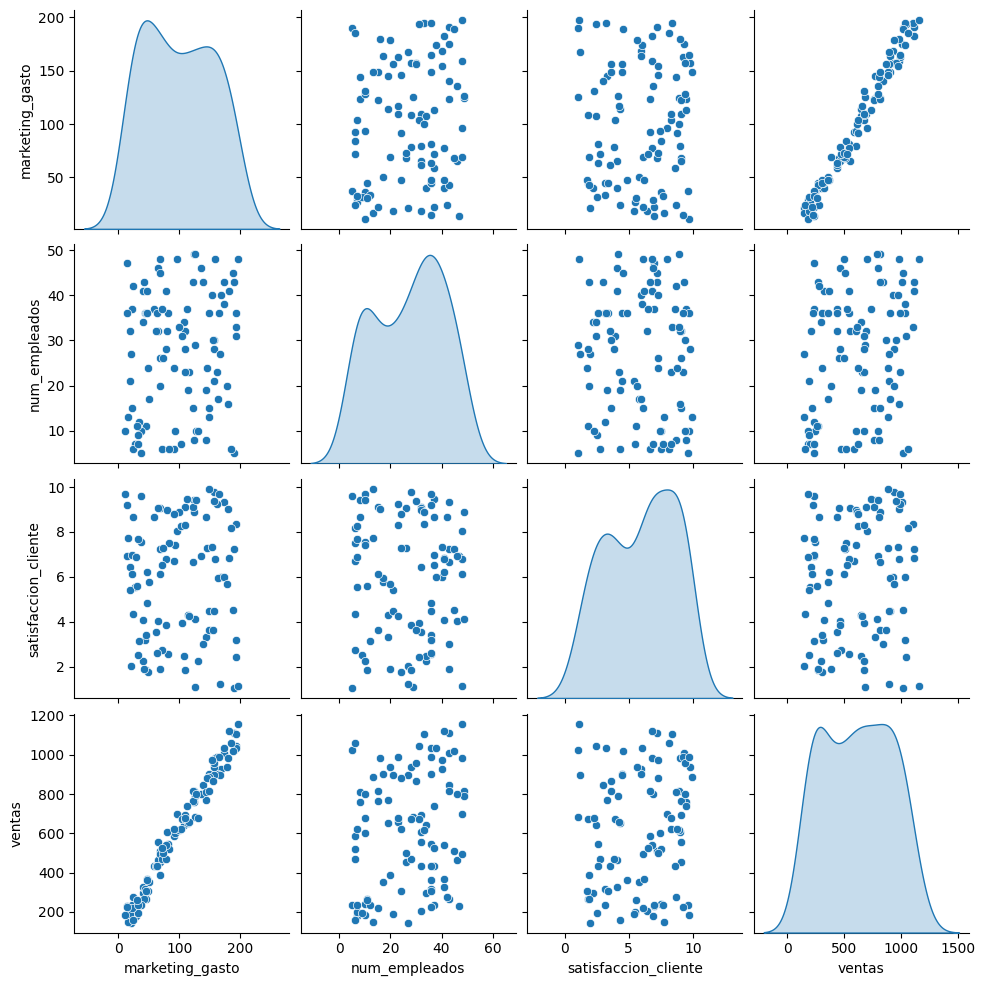

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, diag_kind="kde")
plt.show()




💡 **Pregunta**:

> ¿Qué relaciones visuales se observan entre el gasto en marketing, los empleados y las ventas?

---

### 4. Preparación de datos para la red neuronal


In [2]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("ventas", axis=1)
y = df["ventas"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



NameError: name 'df' is not defined


### 5. Construcción de una red neuronal simple


In [1]:
from tensorflow import keras

# Definición del modelo
model = keras.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1)  # salida regresión
])

model.compile(loss="mean_squared_error", optimizer="adam")

# Entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)

# Gráfico de error
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()



NameError: name 'X_train_scaled' is not defined


---

### 6. Evaluación del modelo



```python
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio en test:", mse)




💡 **Pregunta reflexiva**:

> ¿El error obtenido es aceptable para un contexto de predicción de ventas?
> ¿Qué implicaciones tendría un error alto para la toma de decisiones empresariales?

---

### 7. Predicciones para nuevos casos

```python
nuevos_datos = np.array([[150, 20, 8],  # Ejemplo: gasto marketing 150M, 20 empleados, satisfacción 8
                         [50, 10, 5]])  # Ejemplo: gasto 50M, 10 empleados, satisfacción 5

nuevos_datos_scaled = scaler.transform(nuevos_datos)
predicciones = model.predict(nuevos_datos_scaled)
predicciones
```



💡 **Pregunta final**:

> ¿Cómo interpretarías estas predicciones en un escenario de negocios en Caucasia?
> ¿Podría un administrador usar este modelo como apoyo real en sus decisiones?

---



## Con esta práctica los estudiantes:

1. Generan datos de contexto empresarial.
2. Construyen, entrenan y evalúan una red neuronal.
3. Interpretan resultados en un **lenguaje empresarial** (no solo matemático).
4. Reflexionan sobre su uso real en la región.

---



¿Quieres que te prepare este diseño como un **cuaderno Jupyter listo para usar (.ipynb)**, igual que hicimos con el anterior, para que lo tengas organizado con celdas de texto, código y preguntas interactivas?
